# Finding `country` for each IP address

- Getting the current working directory.

In [1]:
import os
current_dir = os.getcwd()
print('The current working directory: \n', current_dir)

The current working directory: 
 /home/lehoa/Week2


- Giving file names.

In [2]:
fraud_data_file = 'Fraud-Data/Fraud-Data/Fraud_Data.csv'
ipAdd_to_country_file = 'Fraud-Data/Fraud-Data/IpAddress_to_Country.csv'

- Importing data into `DataFrame`.

In [3]:
import pandas as pd
fraud_df = pd.read_csv(os.path.join(current_dir, fraud_data_file))

In [4]:
fraud_df.head(n=10)

user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   
5   159135  2015-05-21 06:03:03  2015-07-09 08:05:14              42   
6    50116  2015-08-01 22:40:52  2015-08-27 03:37:57              11   
7   360585  2015-04-06 07:35:45  2015-05-25 17:21:14              27   
8   159045  2015-04-21 23:38:34  2015-06-02 14:01:54              30   
9   182338  2015-01-25 17:49:49  2015-03-23 23:05:42              62   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  
5  ALEYXFXINSXLZ    Ads  Chrome   M   18  2.809315e+09      0  
6  IWKVZHJOCLPUR    Ads  Chrome   F   19  3.987484e+09      0  
7  HPUCUYLMJBYFW    Ads   Opera   M   34  1.692459e+09      0  
8  ILXYDOZIHOOHT    SEO      IE   F   43  3.719094e+09      0  
9  NRFFPPHZYFUVC    Ads      IE   M   31  3.416747e+08      0

In [5]:
fraud_df.tail(n=10)

user_id          signup_time        purchase_time  purchase_value  \
151102   356404  2015-02-04 10:27:49  2015-05-07 19:37:56              41   
151103     5557  2015-01-04 23:03:04  2015-01-04 23:03:05              27   
151104   252360  2015-01-04 09:40:44  2015-01-04 09:40:45              20   
151105   151643  2015-02-15 20:03:27  2015-05-07 19:28:52              23   
151106   360761  2015-02-10 06:39:44  2015-06-03 08:18:30              13   
151107   345170  2015-01-27 03:03:34  2015-03-29 00:30:47              43   
151108   274471  2015-05-15 17:43:29  2015-05-26 12:24:39              35   
151109   368416  2015-03-03 23:07:31  2015-05-20 07:07:47              40   
151110   207709  2015-07-09 20:06:07  2015-09-07 09:34:46              46   
151111   138208  2015-06-10 07:02:20  2015-07-21 02:03:53              20   

            device_id  source  browser sex  age    ip_address  class  
151102  FXBMCMIOLLNCJ     SEO   Chrome   M   26  1.827348e+09      0  
151103  AWFGZTEHXMWEJ  Direct   Chrome   M   39  3.306999e+09      1  
151104  GSEYHMCBONPHK     Ads       IE   F   39  2.698870e+09      1  
151105  THQOCEAVXXAIW     Ads  FireFox   M   18  1.691181e+09      0  
151106  EFCFFMUKFRDHJ     SEO   Safari   F   42  8.740657e+08      0  
151107  XPSKTWGPWINLR     SEO   Chrome   M   28  3.451155e+09      1  
151108  LYSFABUCPCGBA     SEO   Safari   M   32  2.439047e+09      0  
151109  MEQHCSJUBRBFE     SEO       IE   F   26  2.748471e+09      0  
151110  CMCXFGRHYSTVJ     SEO   Chrome   M   37  3.601175e+09      0  
151111  ZINIADFCLHYPG  Direct       IE   M   38  4.103825e+09      0

In [6]:
fraud_df.shape

(151112, 11)

In [7]:
print('The number of missing values in Fraud data:\n', fraud_df.isnull().sum())

The number of missing values in Fraud data:
 user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


In [8]:
ip_country_df = pd.read_csv(os.path.join(current_dir, ipAdd_to_country_file))

In [9]:
ip_country_df.head(n=10)

lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China
2              16777728.0                16778239      China
3              16778240.0                16779263  Australia
4              16779264.0                16781311      China
5              16781312.0                16785407      Japan
6              16785408.0                16793599      China
7              16793600.0                16809983      Japan
8              16809984.0                16842751   Thailand
9              16842752.0                16843007      China

In [10]:
ip_country_df.tail(n=10)

lower_bound_ip_address  upper_bound_ip_address            country
138836            3.758064e+09              3758079999          Hong Kong
138837            3.758080e+09              3758088191  Korea Republic of
138838            3.758088e+09              3758090239          Indonesia
138839            3.758090e+09              3758091263          Australia
138840            3.758091e+09              3758092287              China
138841            3.758092e+09              3758093311          Hong Kong
138842            3.758093e+09              3758094335              India
138843            3.758095e+09              3758095871              China
138844            3.758096e+09              3758096127          Singapore
138845            3.758096e+09              3758096383          Australia

In [11]:
print('The number of missing values in IP address to countries table:\n', ip_country_df.isnull().sum())

The number of missing values in IP address to countries table:
 lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


- Finding the countries corresponding to the numeric IP addresses.

- Finding the minimum IP address and maximum IP address of the table `IP_address_to_Country`.

The minimum IP address is the lowest number in the lower bound IP addresses.

In [12]:
min_ip = min(ip_country_df.loc[:, 'lower_bound_ip_address'])
print('The minimum IP address: ', min_ip)

The minimum IP address:  16777216.0


The maximum IP address is the highest number in the upper bound IP addresses.

In [13]:
max_ip = max(ip_country_df.loc[:, 'upper_bound_ip_address'])
print('The maximum IP address: ', max_ip)

The maximum IP address:  3758096383


- Sorting the `fraud_data` according to the descending order of `ip_address` and resetting index from `0`.

In [14]:
df = fraud_df.sort_values('ip_address', ascending=False).reset_index(drop=True)
df.head(n=20)

user_id          signup_time        purchase_time  purchase_value  \
0    168001  2015-03-03 11:27:19  2015-05-05 10:32:46              39   
1    172984  2015-08-15 15:40:46  2015-10-30 09:47:39               9   
2    260255  2015-02-18 21:07:18  2015-04-25 06:20:38              17   
3     62422  2015-08-08 06:25:41  2015-08-28 04:01:06              62   
4    361167  2015-04-16 05:00:09  2015-07-31 21:21:47              39   
5    199332  2015-04-13 12:46:02  2015-05-12 05:39:41              30   
6    194165  2015-01-20 08:26:27  2015-04-25 23:05:33              21   
7    364324  2015-03-01 06:17:39  2015-05-05 18:25:15              29   
8    152635  2015-07-11 15:33:46  2015-09-27 05:33:45              25   
9    345310  2015-07-06 01:58:12  2015-10-12 10:02:55              76   
10   232335  2015-05-12 13:24:37  2015-05-14 01:12:06              12   
11    50792  2015-03-21 12:07:39  2015-06-06 08:20:30              31   
12   115622  2015-07-24 07:46:11  2015-10-12 01:36:06              39   
13   132363  2015-04-22 06:49:55  2015-05-08 01:27:17              48   
14   246483  2015-02-27 05:59:44  2015-06-16 19:10:28              19   
15   241996  2015-05-22 19:23:55  2015-06-27 04:14:23              39   
16    28148  2015-04-28 19:49:39  2015-05-17 19:13:41              39   
17   290529  2015-04-14 11:25:16  2015-06-10 21:41:51              26   
18   180657  2015-07-11 22:40:16  2015-10-25 20:08:01              21   
19   249046  2015-06-09 02:21:37  2015-06-14 20:18:46              50   

        device_id  source  browser sex  age    ip_address  class  
0   JLVKRXCKCWNLW     Ads  FireFox   F   41  4.294850e+09      0  
1   TSDCMHPWAUZAR     Ads       IE   F   35  4.294822e+09      0  
2   LPIWPXJCMYJOT     SEO  FireFox   M   19  4.294720e+09      0  
3   YJLXUZPSHUOOS     SEO       IE   M   22  4.294715e+09      0  
4   DDZWCUYTHKALI  Direct  FireFox   F   36  4.294674e+09      0  
5   HYUDTZJHDXDVX     Ads   Chrome   M   26  4.294665e+09      0  
6   JNBGHTNEZGBVI     SEO   Safari   M   21  4.294663e+09      0  
7   AKEJHEVIUDYML     SEO   Chrome   M   39  4.294643e+09      0  
8   UUJAPYTZNOSDT     Ads   Chrome   M   41  4.294629e+09      0  
9   CXYEUOGOGYOFP     SEO  FireFox   M   27  4.294576e+09      0  
10  LFKKZLWVKWKVJ     Ads  FireFox   M   34  4.294546e+09      0  
11  VNLOIBKCKPIEH     Ads   Chrome   M   35  4.294530e+09      0  
12  ZCPWDKMNTVIYN  Direct   Chrome   M   42  4.294466e+09      0  
13  VLHNYVXYYSYPZ     Ads       IE   M   46  4.294388e+09      0  
14  REWNANFXFRPPD  Direct  FireFox   M   58  4.294373e+09      0  
15  JKDKRCPEIQOQQ     Ads   Safari   F   47  4.294311e+09      0  
16  NZBPQNCFZKNEP     Ads       IE   M   21  4.294282e+09      0  
17  CZSQYITEHCNDY  Direct   Chrome   M   23  4.294263e+09      0  
18  AJMCNLVRPXGTQ     Ads   Chrome   F   29  4.294258e+09      0  
19  VWFQVKCKBXKOK     SEO   Chrome   M   20  4.294220e+09      0

In [15]:
def country_from_ipAdd(ip_addr):
    # IP address is satisfied, however, no country is detected
    if len(ip_country_df.loc[(ip_country_df['lower_bound_ip_address'] < ip_addr) & \
                             (ip_addr < ip_country_df['upper_bound_ip_address']), 'country']) == 0:
        return 'None'
    else:
        return ip_country_df.loc[(ip_country_df['lower_bound_ip_address'] < ip_addr) & \
                                 (ip_addr < ip_country_df['upper_bound_ip_address']), 'country'].values[0]

In [16]:
df['country'] = df.apply(lambda r: 'None' if r['ip_address'] < min_ip or r['ip_address'] > max_ip else \
                         country_from_ipAdd(r['ip_address']), axis=1)

In [17]:
pd.options.display.max_rows=100
df.head(n=100)

user_id          signup_time        purchase_time  purchase_value  \
0    168001  2015-03-03 11:27:19  2015-05-05 10:32:46              39   
1    172984  2015-08-15 15:40:46  2015-10-30 09:47:39               9   
2    260255  2015-02-18 21:07:18  2015-04-25 06:20:38              17   
3     62422  2015-08-08 06:25:41  2015-08-28 04:01:06              62   
4    361167  2015-04-16 05:00:09  2015-07-31 21:21:47              39   
5    199332  2015-04-13 12:46:02  2015-05-12 05:39:41              30   
6    194165  2015-01-20 08:26:27  2015-04-25 23:05:33              21   
7    364324  2015-03-01 06:17:39  2015-05-05 18:25:15              29   
8    152635  2015-07-11 15:33:46  2015-09-27 05:33:45              25   
9    345310  2015-07-06 01:58:12  2015-10-12 10:02:55              76   
10   232335  2015-05-12 13:24:37  2015-05-14 01:12:06              12   
11    50792  2015-03-21 12:07:39  2015-06-06 08:20:30              31   
12   115622  2015-07-24 07:46:11  2015-10-12 01:36:06              39   
13   132363  2015-04-22 06:49:55  2015-05-08 01:27:17              48   
14   246483  2015-02-27 05:59:44  2015-06-16 19:10:28              19   
15   241996  2015-05-22 19:23:55  2015-06-27 04:14:23              39   
16    28148  2015-04-28 19:49:39  2015-05-17 19:13:41              39   
17   290529  2015-04-14 11:25:16  2015-06-10 21:41:51              26   
18   180657  2015-07-11 22:40:16  2015-10-25 20:08:01              21   
19   249046  2015-06-09 02:21:37  2015-06-14 20:18:46              50   
20   149973  2015-02-20 01:18:16  2015-04-20 18:16:56              73   
21    96229  2015-03-26 12:39:05  2015-05-24 12:15:42              13   
22   132879  2015-04-16 10:45:28  2015-04-22 11:13:59              22   
23    17019  2015-02-15 13:24:36  2015-03-26 22:08:15              22   
24   159429  2015-03-25 18:39:56  2015-05-05 14:53:12              32   
25   226636  2015-02-22 14:09:42  2015-03-08 03:52:46              40   
26   389211  2015-04-05 16:07:18  2015-07-26 06:26:08              16   
27   121026  2015-04-02 01:17:16  2015-05-29 01:06:09              44   
28   230314  2015-05-15 09:24:49  2015-08-24 14:33:41              12   
29     1452  2015-04-24 18:52:40  2015-07-08 00:44:49              13   
30    82277  2015-06-21 09:10:07  2015-08-01 23:44:51              40   
31   329975  2015-02-13 21:45:46  2015-04-25 15:50:17              34   
32    15623  2015-03-29 22:46:06  2015-05-21 00:41:13              46   
33   220922  2015-01-06 01:07:20  2015-01-24 17:55:27              26   
34   111173  2015-04-29 23:49:41  2015-08-18 01:31:58              44   
35   312685  2015-01-18 03:13:45  2015-05-01 23:35:13              28   
36   113315  2015-08-15 22:48:21  2015-10-03 00:16:57              38   
37   212111  2015-03-14 03:20:38  2015-04-07 18:05:13              77   
38   372662  2015-02-23 21:38:07  2015-05-12 05:59:28              35   
39   308825  2015-04-27 11:09:13  2015-05-26 12:27:06              59   
40   379863  2015-06-05 02:24:01  2015-07-12 02:02:33              20   
41   167083  2015-06-30 11:42:56  2015-07-29 10:22:15              45   
42    15501  2015-08-07 02:16:41  2015-09-24 02:40:42              52   
43    39619  2015-08-13 16:53:06  2015-10-07 06:46:07              24   
44   193485  2015-05-12 20:54:08  2015-06-19 19:01:20              19   
45   256877  2015-07-28 12:24:41  2015-09-16 20:19:51              83   
46   163508  2015-03-04 11:51:34  2015-06-28 22:33:36              57   
47   313779  2015-01-18 06:34:55  2015-05-17 04:18:43              55   
48   214619  2015-07-03 21:38:33  2015-10-14 05:59:08              32   
49   143859  2015-02-06 03:42:05  2015-02-25 03:03:22              13   
50   223246  2015-02-08 19:33:10  2015-05-31 10:07:37              21   
51   214529  2015-06-01 16:40:10  2015-09-14 20:03:23              44   
52   111519  2015-07-09 21:54:50  2015-08-02 14:15:21              61   
53   159058  2015-01-23 21:01:29  2015-05-05 15:34:01         

- Saving the results into a new file.

In [18]:
df.to_csv(os.path.join(current_dir, 'fraud_data_countries.csv'), sep=',')

# Exploration of data analysis

- How many observations in each class `Fraud/No Fraud`.

In [19]:
print('The percentage(%) of observations for each class: \n', df['class'].value_counts()/df.shape[0] * 100)

The percentage(%) of observations for each class: 
 0    90.635423
1     9.364577
Name: class, dtype: float64


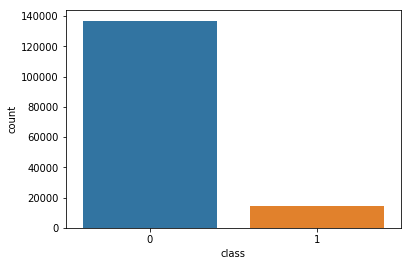

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.countplot(x='class', data=df)

$\rightarrow$ There is an unbalanced distribution in data. Approximately, only 9.4% of data is belonged to  fraudulent cases.

- The mean values of each columns according to each class.

In [21]:
df.groupby('class').mean()

user_id  purchase_value        age    ip_address
class                                                        
0      200098.920123       36.929418  33.122356  2.154235e+09
1      200869.065366       36.993004  33.318281  2.131918e+09

In [22]:
print('The data type for each column: \n', df.dtypes)

The data type for each column: 
 user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
country            object
dtype: object


- Calculating the duration time (in `day` unit) from the day of signing up to the day of purchasing products.

In [23]:
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])
df['class'] = df['class'].astype('str')
df.dtypes

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                     object
country                   object
dtype: object

In [24]:
df['duration'] = pd.to_timedelta(df['purchase_time'] - df['signup_time'], unit='d').dt.days
df.head(n=20)

user_id         signup_time       purchase_time  purchase_value  \
0    168001 2015-03-03 11:27:19 2015-05-05 10:32:46              39   
1    172984 2015-08-15 15:40:46 2015-10-30 09:47:39               9   
2    260255 2015-02-18 21:07:18 2015-04-25 06:20:38              17   
3     62422 2015-08-08 06:25:41 2015-08-28 04:01:06              62   
4    361167 2015-04-16 05:00:09 2015-07-31 21:21:47              39   
5    199332 2015-04-13 12:46:02 2015-05-12 05:39:41              30   
6    194165 2015-01-20 08:26:27 2015-04-25 23:05:33              21   
7    364324 2015-03-01 06:17:39 2015-05-05 18:25:15              29   
8    152635 2015-07-11 15:33:46 2015-09-27 05:33:45              25   
9    345310 2015-07-06 01:58:12 2015-10-12 10:02:55              76   
10   232335 2015-05-12 13:24:37 2015-05-14 01:12:06              12   
11    50792 2015-03-21 12:07:39 2015-06-06 08:20:30              31   
12   115622 2015-07-24 07:46:11 2015-10-12 01:36:06              39   
13   132363 2015-04-22 06:49:55 2015-05-08 01:27:17              48   
14   246483 2015-02-27 05:59:44 2015-06-16 19:10:28              19   
15   241996 2015-05-22 19:23:55 2015-06-27 04:14:23              39   
16    28148 2015-04-28 19:49:39 2015-05-17 19:13:41              39   
17   290529 2015-04-14 11:25:16 2015-06-10 21:41:51              26   
18   180657 2015-07-11 22:40:16 2015-10-25 20:08:01              21   
19   249046 2015-06-09 02:21:37 2015-06-14 20:18:46              50   

        device_id  source  browser sex  age    ip_address class country  \
0   JLVKRXCKCWNLW     Ads  FireFox   F   41  4.294850e+09     0    None   
1   TSDCMHPWAUZAR     Ads       IE   F   35  4.294822e+09     0    None   
2   LPIWPXJCMYJOT     SEO  FireFox   M   19  4.294720e+09     0    None   
3   YJLXUZPSHUOOS     SEO       IE   M   22  4.294715e+09     0    None   
4   DDZWCUYTHKALI  Direct  FireFox   F   36  4.294674e+09     0    None   
5   HYUDTZJHDXDVX     Ads   Chrome   M   26  4.294665e+09     0    None   
6   JNBGHTNEZGBVI     SEO   Safari   M   21  4.294663e+09     0    None   
7   AKEJHEVIUDYML     SEO   Chrome   M   39  4.294643e+09     0    None   
8   UUJAPYTZNOSDT     Ads   Chrome   M   41  4.294629e+09     0    None   
9   CXYEUOGOGYOFP     SEO  FireFox   M   27  4.294576e+09     0    None   
10  LFKKZLWVKWKVJ     Ads  FireFox   M   34  4.294546e+09     0    None   
11  VNLOIBKCKPIEH     Ads   Chrome   M   35  4.294530e+09     0    None   
12  ZCPWDKMNTVIYN  Direct   Chrome   M   42  4.294466e+09     0    None   
13  VLHNYVXYYSYPZ     Ads       IE   M   46  4.294388e+09     0    None   
14  REWNANFXFRPPD  Direct  FireFox   M   58  4.294373e+09     0    None   
15  JKDKRCPEIQOQQ     Ads   Safari   F   47  4.294311e+09     0    None   
16  NZBPQNCFZKNEP     Ads       IE   M   21  4.294282e+09     0    None   
17  CZSQYITEHCNDY  Direct   Chrome   M   23  4.294263e+09     0    None   
18  AJMCNLVRPXGTQ     Ads   Chrome   F   29  4.294258e+09     0    None   
19  VWFQVKCKBXKOK     SEO   Chrome   M   20  4.294220e+09     0    None   

    duration  
0         62  
1         75  
2         65  
3         19  
4        106  
5         28  
6         95  
7         65  
8         77  
9         98  
10         1  
11        76  
12        79  
13        15  
14       109  
15        35  
16        18  
17        57  
18       105  
19         5

In [25]:
pd.options.display.max_columns = None
df.groupby('class').describe().T

class                            0             1
age            count  1.369610e+05  1.415100e+04
               mean   3.312236e+01  3.331828e+01
               std    8.622678e+00  8.568001e+00
               min    1.800000e+01  1.800000e+01
               25%    2.700000e+01  2.700000e+01
               50%    3.300000e+01  3.300000e+01
               75%    3.900000e+01  3.900000e+01
               max    7.600000e+01  6.800000e+01
duration       count  1.369610e+05  1.415100e+04
               mean   5.958415e+01  2.782242e+01
               std    3.458810e+01  3.815506e+01
               min    0.000000e+00  0.000000e+00
               25%    2.900000e+01  0.000000e+00
               50%    6.000000e+01  0.000000e+00
               75%    9.000000e+01  5.500000e+01
               max    1.190000e+02  1.190000e+02
ip_address     count  1.369610e+05  1.415100e+04
               mean   2.154235e+09  2.131918e+09
               std    1.250927e+09  1.224590e+09
               min    5.209350e+04  2.278096e+06
               25%    1.084381e+09  1.107616e+09
               50%    2.155916e+09  2.141692e+09
               75%    3.249408e+09  3.184225e+09
               max    4.294850e+09  4.294131e+09
purchase_value count  1.369610e+05  1.415100e+04
               mean   3.692942e+01  3.699300e+01
               std    1.831506e+01  1.839765e+01
               min    9.000000e+00  9.000000e+00
               25%    2.200000e+01  2.200000e+01
               50%    3.500000e+01  3.500000e+01
               75%    4.900000e+01  4.900000e+01
               max    1.540000e+02  1.110000e+02
user_id        count  1.369610e+05  1.415100e+04
               mean   2.000989e+05  2.008691e+05
               std    1.152400e+05  1.166150e+05
               min    2.000000e+00  3.900000e+01
               25%    1.007890e+05  9.831400e+04
               50%    1.999090e+05  2.005260e+05
               75%    2.997240e+05  3.030180e+05
               max    3.999970e+05  4.000000e+05

In [26]:
df.describe()

user_id  purchase_value            age    ip_address  \
count  151112.000000   151112.000000  151112.000000  1.511120e+05   
mean   200171.040970       36.935372      33.140704  2.152145e+09   
std    115369.285024       18.322762       8.617733  1.248497e+09   
min         2.000000        9.000000      18.000000  5.209350e+04   
25%    100642.500000       22.000000      27.000000  1.085934e+09   
50%    199958.000000       35.000000      33.000000  2.154770e+09   
75%    300054.000000       49.000000      39.000000  3.243258e+09   
max    400000.000000      154.000000      76.000000  4.294850e+09   

            duration  
count  151112.000000  
mean       56.609799  
std        36.142085  
min         0.000000  
25%        25.000000  
50%        57.000000  
75%        88.000000  
max       119.000000

$\rightarrow$ From two above tables, it is easily to see that the mean values of `purchase_value`, `age` for each class are not differ so much compared to the mean values of them for both of classes. However, the mean value of `duration` (the period time between the date of signing up and the date of purchasing) for each class is very different from the mean value of both classes (i.e. ~59 days for class `0` and ~27 days for class `1`, while ~57 days for both of classes). Therefore, the `duration` can be a criterion to predict fraudulent transactions.

- Distribution of classes for each attribute.

- `class` vs `purchase value`.

In [27]:
print('Information about purchase value column\n')
df['purchase_value'].describe()

Information about purchase value column



count    151112.000000
mean         36.935372
std          18.322762
min           9.000000
25%          22.000000
50%          35.000000
75%          49.000000
max         154.000000
Name: purchase_value, dtype: float64

Text(0.5,0,'% of Fraud')

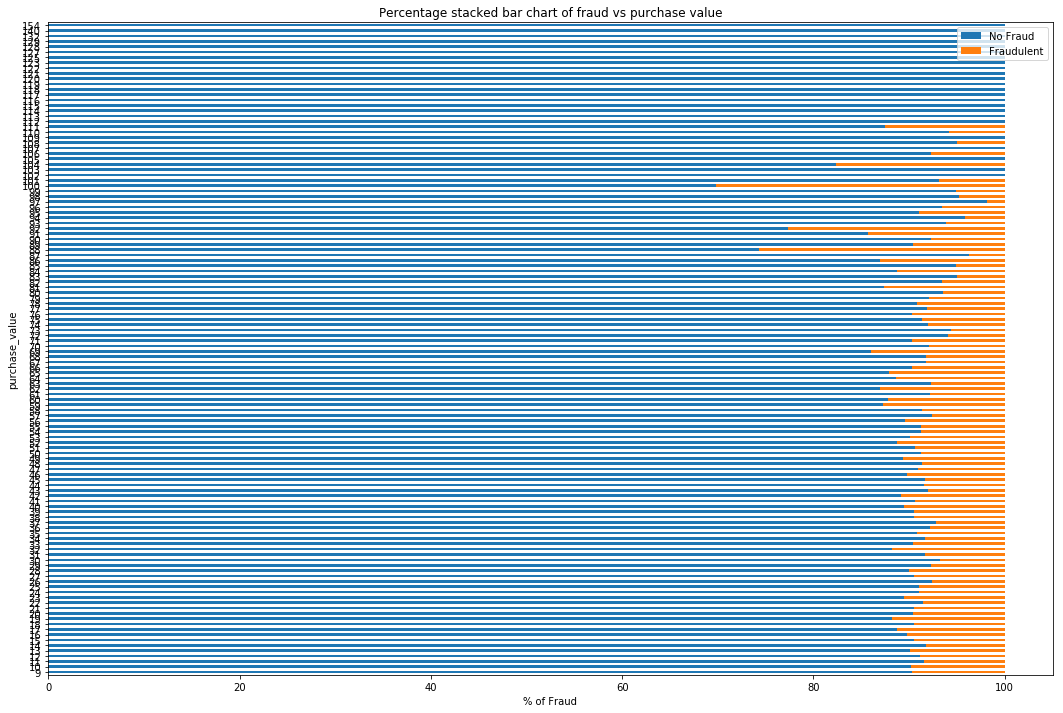

In [28]:
fig_size = (18, 12)

crtable = pd.crosstab(index=df['purchase_value'], columns=df['class'])
crtable.div(crtable.sum(axis='columns').astype(float) / 100, axis='rows').plot(kind='barh', stacked=True,
                                                                               figsize=fig_size)
plt.legend(labels=['No Fraud', 'Fraudulent'], loc='upper right')
plt.title('Percentage stacked bar chart of fraud vs purchase value')
plt.ylabel('purchase_value')
plt.xlabel('% of Fraud')

In [29]:
perc_table = crtable.div(crtable.sum(axis='columns').astype(float) / 100, axis='rows')
perc_table[perc_table['1'] == max(perc_table['1'])]

class                   0          1
purchase_value                      
100             69.811321  30.188679

$\rightarrow$ From the above images, the purchase values leaded to the majority of frauds are `100`, `88` and `92`.

- `class` vs `source`.

Text(0,0.5,'% of Fraud')

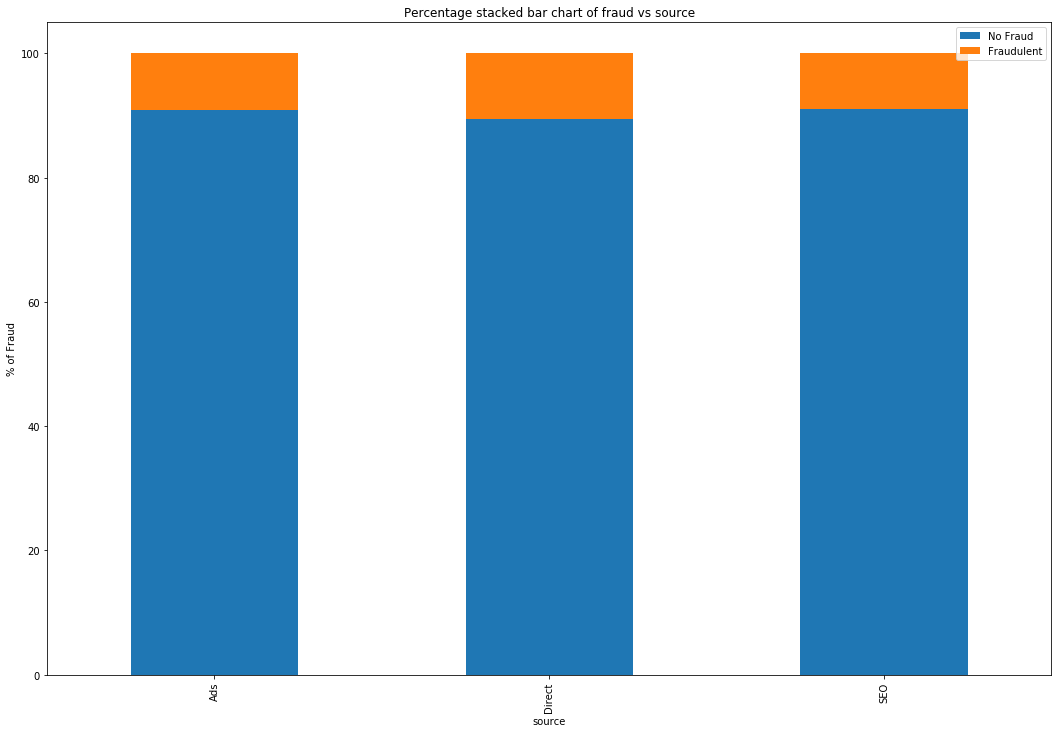

In [30]:
fig_size = (18, 12)

crtable = pd.crosstab(index=df['source'], columns=df['class'])
crtable.div(crtable.sum(axis='columns').astype(float) / 100, axis='rows').plot(kind='bar', stacked=True,
                                                                               figsize=fig_size)
plt.legend(labels=['No Fraud', 'Fraudulent'], loc='upper right')
plt.title('Percentage stacked bar chart of fraud vs source')
plt.xlabel('source')
plt.ylabel('% of Fraud')

In [31]:
perc_table = crtable.div(crtable.sum(axis='columns').astype(float) / 100, axis='rows')
perc_table[perc_table['1'] == max(perc_table['1'])]

class           0          1
source                      
Direct  89.463026  10.536974

$\rightarrow$ The percentage of frauds from three sources are almost the same, however, the `Direct` percent has a little bit higher than two others.

- `class` vs `browser`.

Text(0,0.5,'% of Fraud')

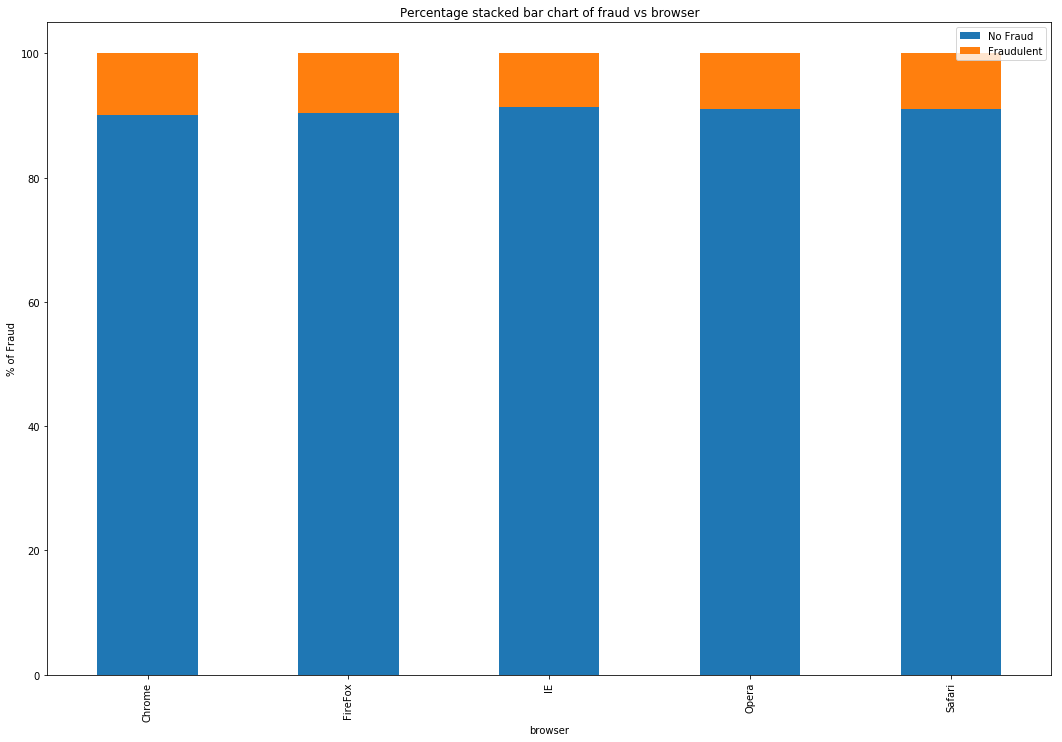

In [32]:
fig_size = (18, 12)

crtable = pd.crosstab(index=df['browser'], columns=df['class'])
crtable.div(crtable.sum(axis='columns').astype(float) / 100, axis='rows').plot(kind='bar', stacked=True,
                                                                               figsize=fig_size)
plt.legend(labels=['No Fraud', 'Fraudulent'], loc='upper right')
plt.title('Percentage stacked bar chart of fraud vs browser')
plt.xlabel('browser')
plt.ylabel('% of Fraud')

In [33]:
perc_table = crtable.div(crtable.sum(axis='columns').astype(float) / 100, axis='rows')
perc_table[perc_table['1'] == max(perc_table['1'])]

class            0         1
browser                     
Chrome   90.120784  9.879216

$\rightarrow$ The percent of frauds are almost the same between browsers, but `Chrome` and `Firefox` have a slightly high.

- `class` vs `sex`.

Text(0,0.5,'% of Fraud')

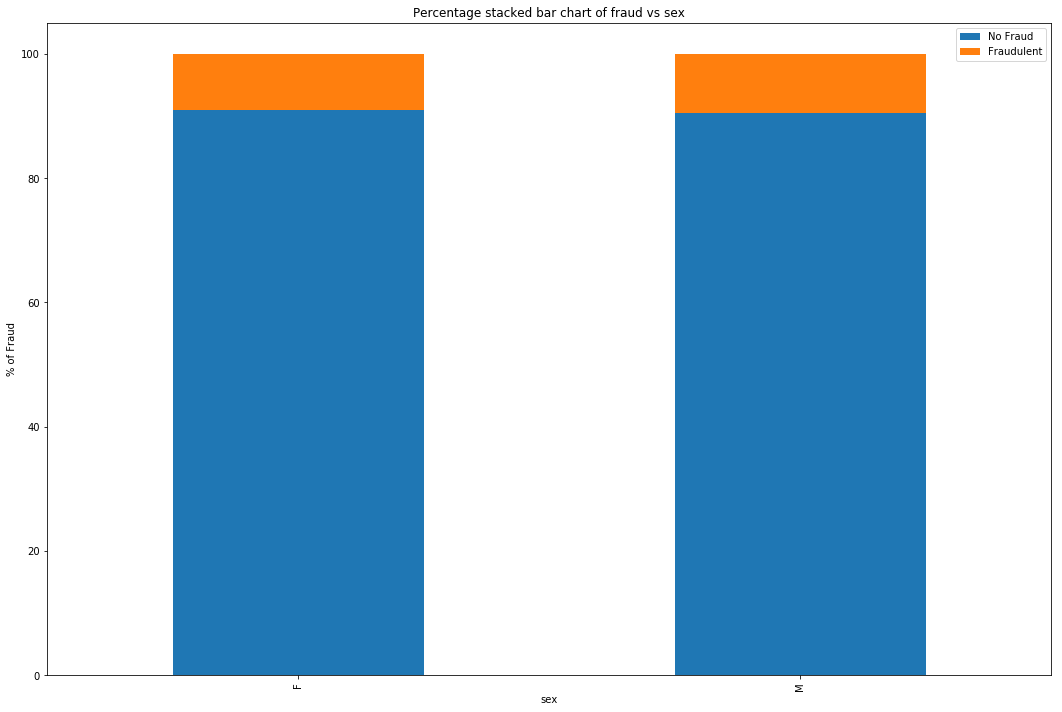

In [34]:
fig_size = (18, 12)

crtable = pd.crosstab(index=df['sex'], columns=df['class'])
crtable.div(crtable.sum(axis='columns').astype(float) / 100, axis='rows').plot(kind='bar', stacked=True,
                                                                               figsize=fig_size)
plt.legend(labels=['No Fraud', 'Fraudulent'], loc='upper right')
plt.title('Percentage stacked bar chart of fraud vs sex')
plt.xlabel('sex')
plt.ylabel('% of Fraud')

In [35]:
perc_table = crtable.div(crtable.sum(axis='columns').astype(float) / 100, axis='rows')
perc_table[perc_table['1'] == max(perc_table['1'])]

class          0         1
sex                       
M      90.447714  9.552286

$\rightarrow$ Males are likely to have a risk transaction than females.

- `class` vs `age`.

In [36]:
df['age'].describe()

count    151112.000000
mean         33.140704
std           8.617733
min          18.000000
25%          27.000000
50%          33.000000
75%          39.000000
max          76.000000
Name: age, dtype: float64

$\rightarrow$ the range of age is from 18 to 76 years old.

Text(0.5,0,'% of Fraud')

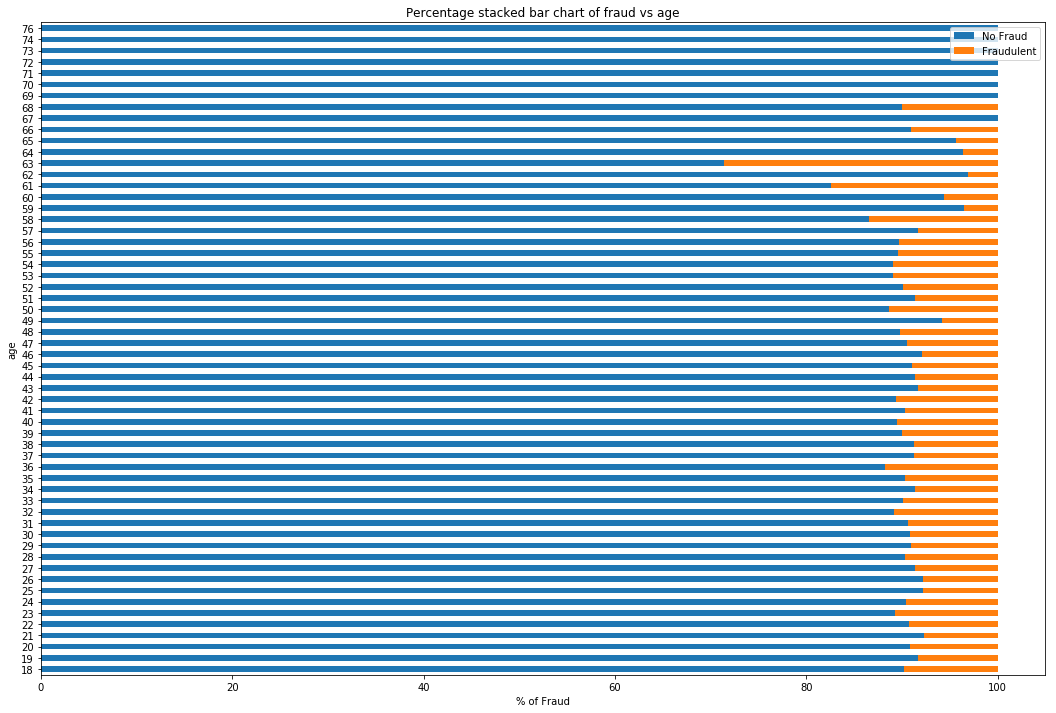

In [37]:
fig_size = (18, 12)

crtable = pd.crosstab(index=df['age'], columns=df['class'])
crtable.div(crtable.sum(axis='columns').astype(float) / 100, axis='rows').plot(kind='barh', stacked=True,
                                                                               figsize=fig_size)
plt.legend(labels=['No Fraud', 'Fraudulent'], loc='upper right')
plt.title('Percentage stacked bar chart of fraud vs age')
plt.ylabel('age')
plt.xlabel('% of Fraud')

In [38]:
perc_table = crtable.div(crtable.sum(axis='columns').astype(float) / 100, axis='rows')
perc_table[perc_table['1'] == max(perc_table['1'])]

class          0          1
age                        
63     71.428571  28.571429

$\rightarrow$ the age that are at a risk in fraudulent mostly is `63` years old. Following this age is the 61-year people with the second highest risk at transactions.

- `class` vs `country`.

In [39]:
pivot_table = df.pivot_table(values='user_id', index='country', columns="class", aggfunc="count", margins=True)
display(pivot_table.head(n=10))

class                     0      1   All
country                                 
Afghanistan             5.0    1.0     6
Albania                13.0    NaN    13
Algeria               109.0   13.0   122
Angola                 23.0    1.0    24
Antigua and Barbuda     3.0    NaN     3
Argentina             595.0   66.0   661
Armenia                13.0    2.0    15
Australia            1679.0  165.0  1844
Austria               402.0   33.0   435
Azerbaijan             21.0    2.0    23

In [40]:
crtable = pivot_table.sort_values(by='All', ascending=False).iloc[0:20, 0:2]
display(crtable)

class                                   0        1
country                                           
All                              136961.0  14151.0
United States                     52498.0   5551.0
None                              20083.0   1883.0
China                             10995.0   1043.0
Japan                              6591.0    715.0
United Kingdom                     4013.0    477.0
Korea Republic of                  3782.0    380.0
Germany                            3384.0    262.0
France                             2861.0    300.0
Canada                             2627.0    348.0
Brazil                             2691.0    270.0
Italy                              1778.0    166.0
Australia                          1679.0    165.0
Netherlands                        1557.0    123.0
Russian Federation                 1482.0    134.0
India                              1159.0    151.0
Taiwan; Republic of China (ROC)    1138.0     99.0
Mexico                              977.0    144.0
Sweden                              959.0    131.0
Spain                               954.0     73.0

- Filter out the first row.

In [41]:
crtable = crtable.iloc[1:20, 0:2]
crtable

class                                  0       1
country                                         
United States                    52498.0  5551.0
None                             20083.0  1883.0
China                            10995.0  1043.0
Japan                             6591.0   715.0
United Kingdom                    4013.0   477.0
Korea Republic of                 3782.0   380.0
Germany                           3384.0   262.0
France                            2861.0   300.0
Canada                            2627.0   348.0
Brazil                            2691.0   270.0
Italy                             1778.0   166.0
Australia                         1679.0   165.0
Netherlands                       1557.0   123.0
Russian Federation                1482.0   134.0
India                             1159.0   151.0
Taiwan; Republic of China (ROC)   1138.0    99.0
Mexico                             977.0   144.0
Sweden                             959.0   131.0
Spain                              954.0    73.0

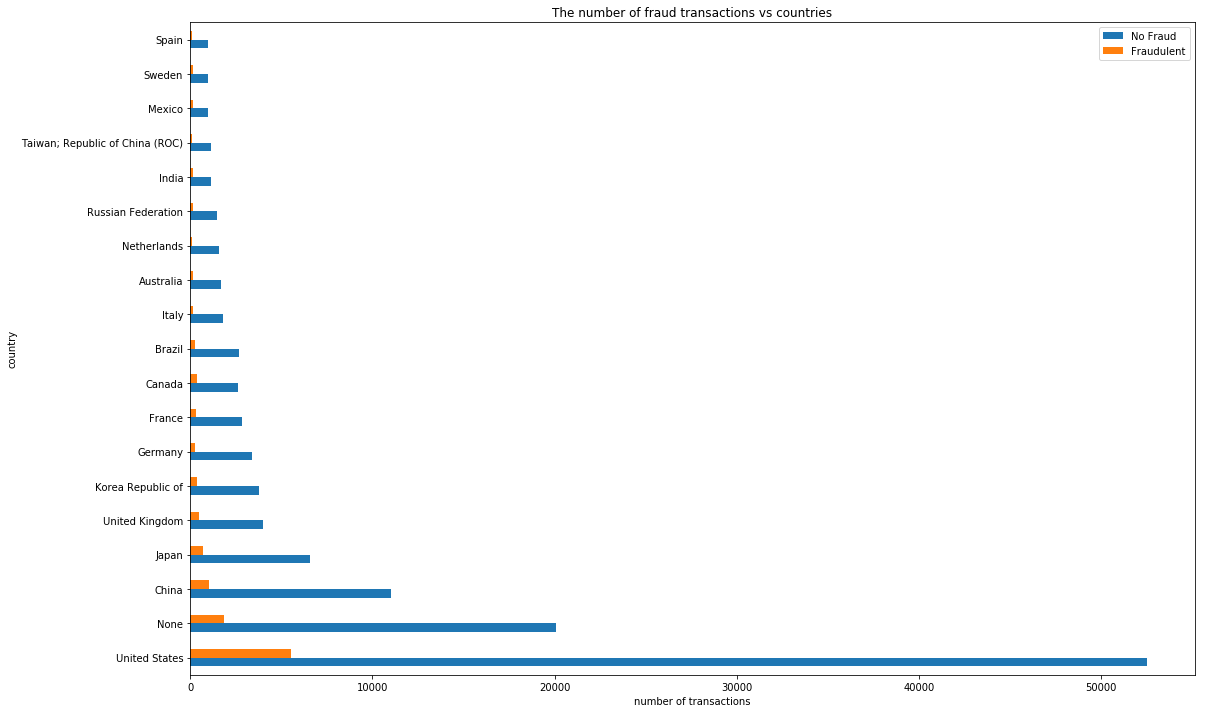

In [42]:
crtable.plot(kind='barh', figsize=fig_size)
plt.title('The number of fraud transactions vs countries')
plt.xlabel('number of transactions')
plt.ylabel('country')
plt.legend(labels=['No Fraud', 'Fraudulent'], loc='upper right')

In [43]:
perc_table = pivot_table.div(pivot_table.sum(axis='columns').astype(float) / 100, 
                             axis='rows').sort_values(by='1', ascending=False).iloc[0:20, 0:2]
perc_table

class                          0          1
country                                    
Turkmenistan                 NaN  50.000000
Namibia                28.260870  21.739130
Sri Lanka              29.032258  20.967742
Luxembourg             30.555556  19.444444
Virgin Islands (U.S.)  33.333333  16.666667
Ecuador                36.792453  13.207547
Tunisia                36.864407  13.135593
Peru                   36.974790  13.025210
Bolivia                37.735849  12.264151
Kuwait                 38.333333  11.666667
Ireland                38.541667  11.458333
New Zealand            38.848921  11.151079
Uzbekistan             40.000000  10.000000
Lithuania              40.526316   9.473684
Saudi Arabia           40.530303   9.469697
Malta                  40.909091   9.090909
Cote D'ivoire          41.666667   8.333333
Afghanistan            41.666667   8.333333
Denmark                42.040816   7.959184
Chile                  42.326139   7.673861

In [44]:
df[df['country'] == 'Turkmenistan']

user_id         signup_time       purchase_time  purchase_value  \
95036   138998 2015-02-27 14:39:08 2015-03-31 12:12:40              37   

           device_id source  browser sex  age    ip_address class  \
95036  RSEQYZOIJLVPL    SEO  FireFox   F   29  1.583788e+09     1   

            country  duration  
95036  Turkmenistan        31

$\rightarrow$ There is only one transaction from `Turkmenistan`, so removing it from the table.

In [45]:
perc_table = perc_table.iloc[1:20, 0:2]
display(perc_table)

class                          0          1
country                                    
Namibia                28.260870  21.739130
Sri Lanka              29.032258  20.967742
Luxembourg             30.555556  19.444444
Virgin Islands (U.S.)  33.333333  16.666667
Ecuador                36.792453  13.207547
Tunisia                36.864407  13.135593
Peru                   36.974790  13.025210
Bolivia                37.735849  12.264151
Kuwait                 38.333333  11.666667
Ireland                38.541667  11.458333
New Zealand            38.848921  11.151079
Uzbekistan             40.000000  10.000000
Lithuania              40.526316   9.473684
Saudi Arabia           40.530303   9.469697
Malta                  40.909091   9.090909
Cote D'ivoire          41.666667   8.333333
Afghanistan            41.666667   8.333333
Denmark                42.040816   7.959184
Chile                  42.326139   7.673861

Text(0.5,0,'% of Fraud')

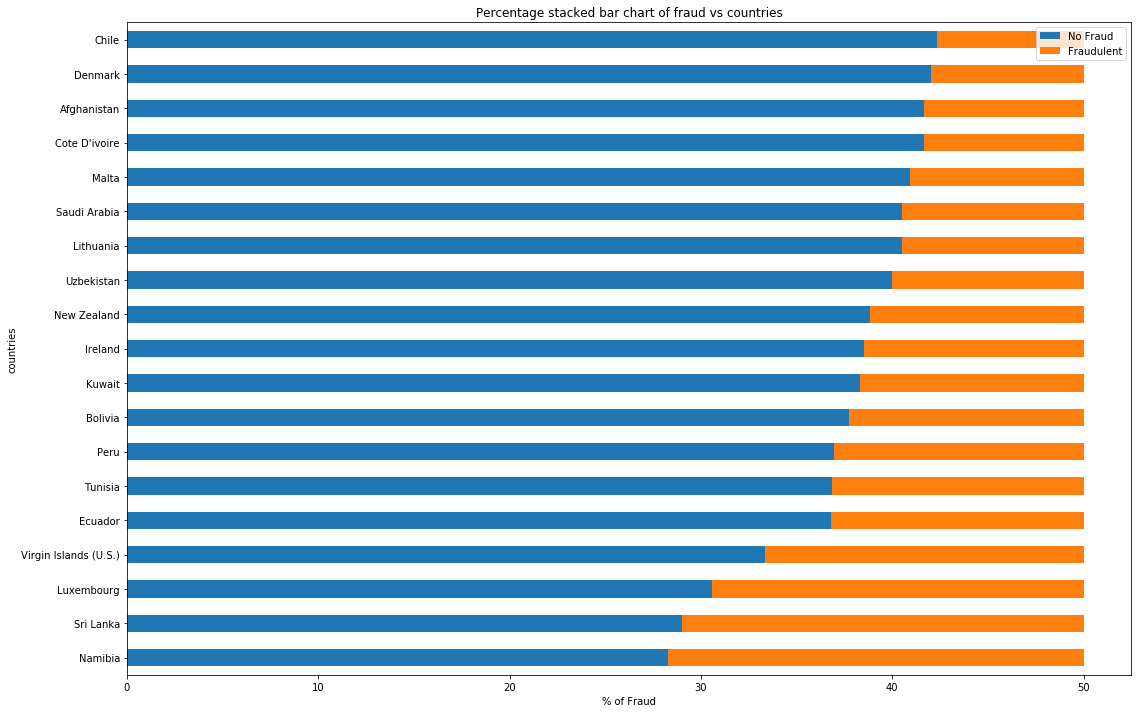

In [46]:
fig_size = (18, 12)

perc_table.plot(kind='barh', stacked=True, figsize=fig_size)
plt.legend(labels=['No Fraud', 'Fraudulent'], loc='upper right')
plt.title('Percentage stacked bar chart of fraud vs countries')
plt.ylabel('countries')
plt.xlabel('% of Fraud')

$\rightarrow$ The percentage of fraud transactions is major from `Namibia`, followed by `Sri Lanka` and `Luxembourg`, respectively.

- `class` vs `duration`.

Text(0.5,0,'% of Fraud')

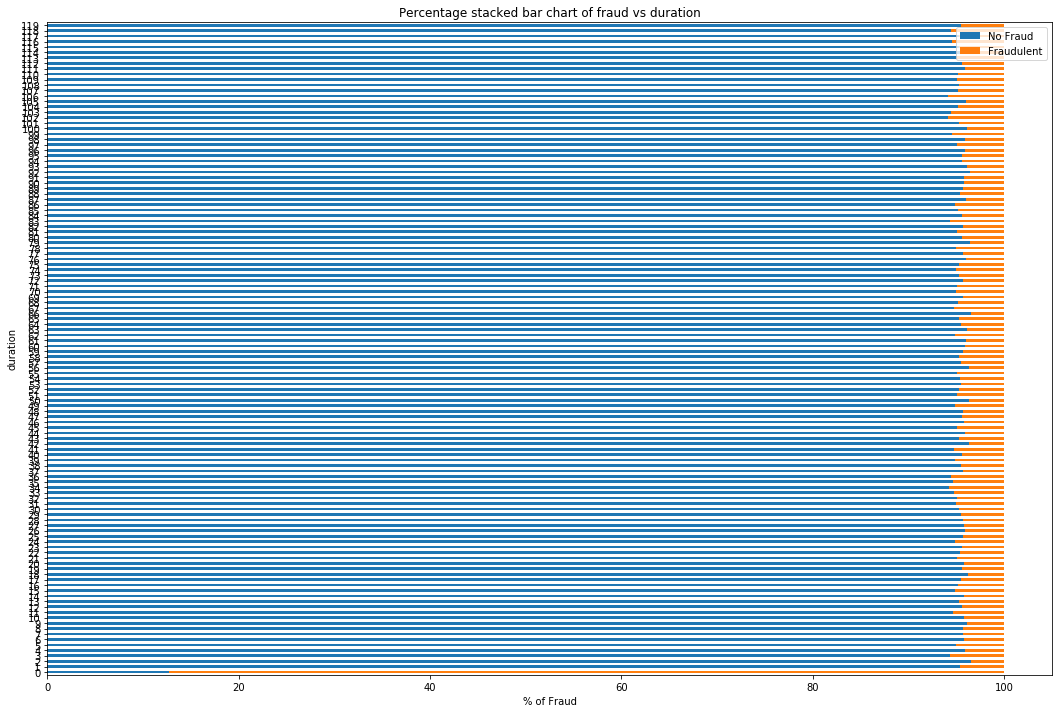

In [47]:
fig_size = (18, 12)

crtable = pd.crosstab(index=df['duration'], columns=df['class'])
crtable.div(crtable.sum(axis='columns').astype(float) / 100, axis='rows').plot(kind='barh', stacked=True,
                                                                               figsize=fig_size)
plt.legend(labels=['No Fraud', 'Fraudulent'], loc='upper right')
plt.title('Percentage stacked bar chart of fraud vs duration')
plt.ylabel('duration')
plt.xlabel('% of Fraud')

$\rightarrow$ the rate of fraud transactions of 0-day duration from the date of signing up is the largest ratio, nearly ~90%.

# Encoding the category features

- `source`, `browser`, `sex`.

In [48]:
df.dtypes

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                     object
country                   object
duration                   int64
dtype: object

In [49]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
def category_encoder(df, columns):
    lab_enc = LabelEncoder()
#     oh_enc = OneHotEncoder()

    for col in columns:
        df[col + '_enc'] = lab_enc.fit_transform(df[col])
#         X = oh_enc.fit_transform(df[col + '_enc'].values.reshape(-1, 1)).toarray()
#         print(oh_enc.feature_indices_)
#         dfOneHot = pd.DataFrame(X, columns = [col + '_' + str(int(i)) for i in range(X.shape[1])])
#         df = pd.concat([df, dfOneHot], axis=1)
    return df

In [50]:
df = category_encoder(df, columns=['source', 'browser', 'sex', 'country'])

In [51]:
df.head(n=10)

user_id         signup_time       purchase_time  purchase_value  \
0   168001 2015-03-03 11:27:19 2015-05-05 10:32:46              39   
1   172984 2015-08-15 15:40:46 2015-10-30 09:47:39               9   
2   260255 2015-02-18 21:07:18 2015-04-25 06:20:38              17   
3    62422 2015-08-08 06:25:41 2015-08-28 04:01:06              62   
4   361167 2015-04-16 05:00:09 2015-07-31 21:21:47              39   
5   199332 2015-04-13 12:46:02 2015-05-12 05:39:41              30   
6   194165 2015-01-20 08:26:27 2015-04-25 23:05:33              21   
7   364324 2015-03-01 06:17:39 2015-05-05 18:25:15              29   
8   152635 2015-07-11 15:33:46 2015-09-27 05:33:45              25   
9   345310 2015-07-06 01:58:12 2015-10-12 10:02:55              76   

       device_id  source  browser sex  age    ip_address class country  \
0  JLVKRXCKCWNLW     Ads  FireFox   F   41  4.294850e+09     0    None   
1  TSDCMHPWAUZAR     Ads       IE   F   35  4.294822e+09     0    None   
2  LPIWPXJCMYJOT     SEO  FireFox   M   19  4.294720e+09     0    None   
3  YJLXUZPSHUOOS     SEO       IE   M   22  4.294715e+09     0    None   
4  DDZWCUYTHKALI  Direct  FireFox   F   36  4.294674e+09     0    None   
5  HYUDTZJHDXDVX     Ads   Chrome   M   26  4.294665e+09     0    None   
6  JNBGHTNEZGBVI     SEO   Safari   M   21  4.294663e+09     0    None   
7  AKEJHEVIUDYML     SEO   Chrome   M   39  4.294643e+09     0    None   
8  UUJAPYTZNOSDT     Ads   Chrome   M   41  4.294629e+09     0    None   
9  CXYEUOGOGYOFP     SEO  FireFox   M   27  4.294576e+09     0    None   

   duration  source_enc  browser_enc  sex_enc  country_enc  
0        62           0            1        0          124  
1        75           0            2        0          124  
2        65           2            1        1          124  
3        19           2            2        1          124  
4       106           1            1        0          124  
5        28           0            0        1          124  
6        95           2            4        1          124  
7        65           2            0        1          124  
8        77           0            0        1          124  
9        98           2            1        1          124

- Feature selection.

In [52]:
y = df['class']
# X = df.drop(['user_id', 'signup_time', 'purchase_time', 'device_id', 'source', 'browser', 'sex', 'ip_address', \
#              'class', 'country', 'source_enc', 'browser_enc', 'sex_enc', 'country_enc'], axis=1)
X = df.drop(['user_id', 'signup_time', 'purchase_time', 'device_id', 'source', 'browser', 'sex', 'ip_address', \
             'class', 'country'], axis=1)

In [53]:
display(X.head())

purchase_value  age  duration  source_enc  browser_enc  sex_enc  \
0              39   41        62           0            1        0   
1               9   35        75           0            2        0   
2              17   19        65           2            1        1   
3              62   22        19           2            2        1   
4              39   36       106           1            1        0   

   country_enc  
0          124  
1          124  
2          124  
3          124  
4          124

- Check the correlation between features (Pearson Correlation)

In [54]:
corr = X.corr()

In [55]:
print(corr)

                purchase_value       age  duration  source_enc  browser_enc  \
purchase_value        1.000000  0.002370  0.003422    0.000417    -0.001727   
age                   0.002370  1.000000 -0.000570   -0.000875     0.002176   
duration              0.003422 -0.000570  1.000000    0.003772     0.013028   
source_enc            0.000417 -0.000875  0.003772    1.000000     0.004397   
browser_enc          -0.001727  0.002176  0.013028    0.004397     1.000000   
sex_enc               0.001996  0.004093 -0.005210    0.001025     0.000002   
country_enc          -0.003736  0.004073 -0.000380   -0.001991     0.000742   

                 sex_enc  country_enc  
purchase_value  0.001996    -0.003736  
age             0.004093     0.004073  
duration       -0.005210    -0.000380  
source_enc      0.001025    -0.001991  
browser_enc     0.000002     0.000742  
sex_enc         1.000000    -0.001873  
country_enc    -0.001873     1.000000  


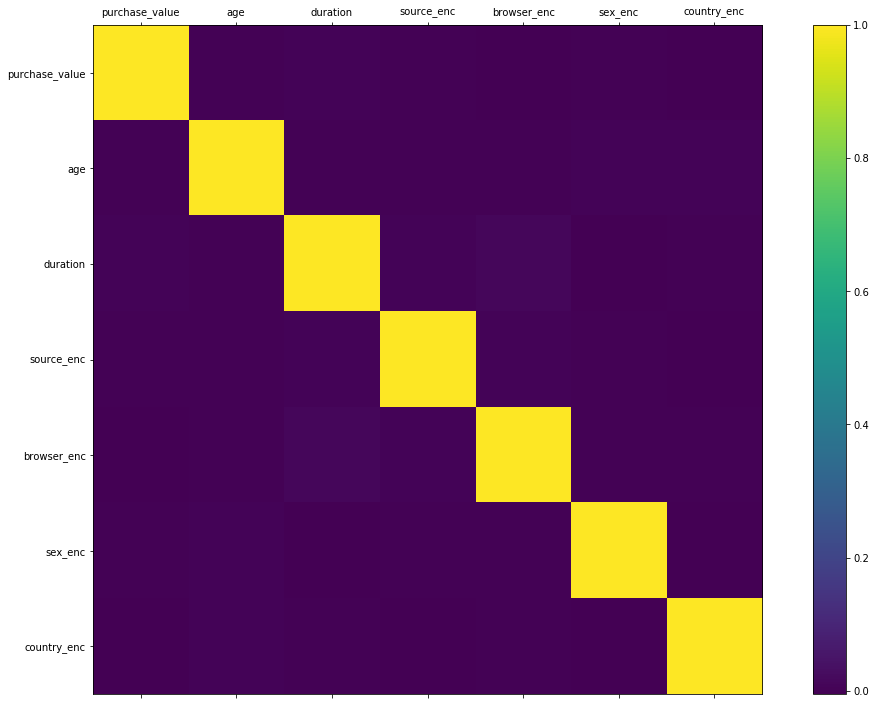

In [56]:
plt.figure(figsize=fig_size)
plt.matshow(X.corr(method='pearson') ,fignum=1)
plt.xticks(range(len(X.columns)), X.columns)
plt.yticks(range(len(X.columns)), X.columns)
plt.colorbar()
plt.show()

$\rightarrow$ No high correlation between features $\rightarrow$ can use all of them.

- Feature ranking by recursive feature elimination with cross-validated selection.

In [57]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

# Create a RFE object and compute the cross-validated score
model = LogisticRegression()
rfecv = RFECV(estimator=model, step=1, cv=10, scoring='accuracy')
fit = rfecv.fit(X, y)

In [58]:
print(('The number of features: %d') % fit.n_features_)

The number of features: 7


$\rightarrow$ Use RFE with the logistic regression algorithm and cross validation method to select the top features. The result is all `7` features are selected. 

- Standardization of data.

In [59]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print('The mean value of standardized data:\n')
column_names = X.columns.tolist()
t = pd.DataFrame(X_std.mean(axis=0)).T.rename(index={0: 'mean'})
t.columns = column_names
display(t)
print('The variance value of standardized data:\n')
t = pd.DataFrame(X_std.var(axis=0)).T.rename(index={0: 'variance'})
t.columns = column_names
display(t)

The mean value of standardized data:



purchase_value           age      duration    source_enc   browser_enc  \
mean    3.695845e-17  8.696522e-17 -8.162834e-17 -1.063378e-16  3.507762e-17   

           sex_enc   country_enc  
mean -1.278499e-16 -8.576618e-17

The variance value of standardized data:



purchase_value  age  duration  source_enc  browser_enc  sex_enc  \
variance             1.0  1.0       1.0         1.0          1.0      1.0   

          country_enc  
variance          1.0

$\rightarrow$ The data is standardized by removing the mean and scaling to unit variance, which lead to the distribution of data with 0-mean and 1-unit variance.

- Principal Component Analysis(PCA) to reduce the dimensionality of the data.

In [60]:
from sklearn.decomposition import PCA
# Create the covariance matrix
covar_matrix = PCA(n_components=X_std.shape[1], whiten=True)
# Calculate eigenvalues
covar_matrix.fit_transform(X_std)
variance = covar_matrix.explained_variance_ratio_
cum_variance = np.round(covar_matrix.explained_variance_ratio_.cumsum() * 100, 2)
display('The percentage of explained variance of each dimension')
display(cum_variance)
display('The shape is: {}'.format(cum_variance.shape))

'The percentage of explained variance of each dimension'

array([ 14.51,  28.88,  43.25,  57.54,  71.76,  85.93, 100.  ])

'The shape is: (7,)'

'The relationship of the number of features and the percentage of explained variance'

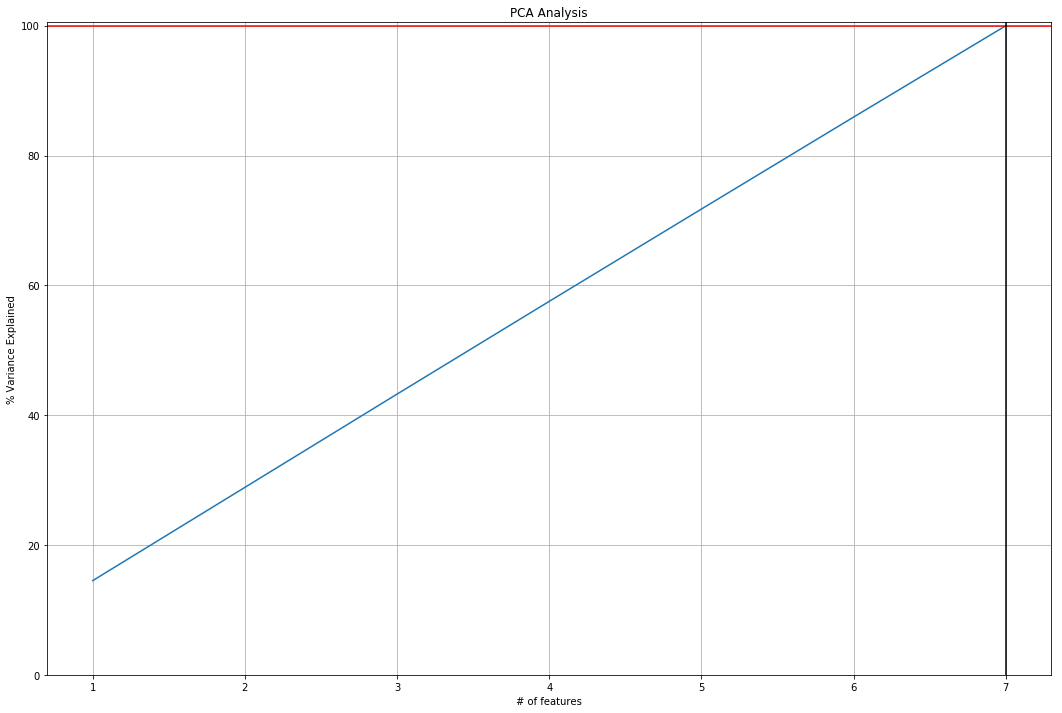

The number of features keep the most percentage of information is: 7
with 100.00%


In [61]:
display('The relationship of the number of features and the percentage of explained variance')
# Sort and select
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(1, figsize=fig_size)
plt.clf()
plt.ylabel('% Variance Explained')
plt.xlabel('# of features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.style.context('seaborn-whitegrid')
new = plt.plot(range(1, len(cum_variance) + 1), cum_variance)
xvalues = new[0].get_xdata()
yvalues = new[0].get_ydata()
x_argmax_y = yvalues.argmax()
plt.axhline(y=yvalues[x_argmax_y], color='r')
plt.axvline(x=x_argmax_y + 1, color='k')
p = round(yvalues[x_argmax_y], 2)
plt.grid(True)
plt.show()
print('The number of features keep the most percentage of information is: {}'.format(x_argmax_y + 1))
print('with %3.2f%%' % yvalues[x_argmax_y])

$\rightarrow$ The PCA cannot help to reduce the data.

- Feature importance

- The Extra Trees Classifier can be used to estimate the importance of data.

In [62]:
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, y)
display(pd.DataFrame(list(zip(X.columns, model.feature_importances_)), 
                     columns=['Attribute', 'Importance']).sort_values(by='Importance', 
                                                                      ascending=False).set_index('Attribute'))

/usr/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Importance
Attribute                 
duration          0.499922
purchase_value    0.199399
age               0.158465
country_enc       0.105345
browser_enc       0.021774
source_enc        0.009919
sex_enc           0.005176

Text(0,0.5,'Importance')

<Figure size 1296x864 with 0 Axes>

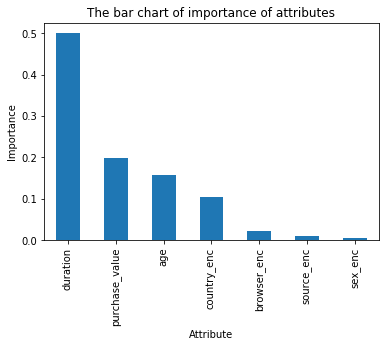

In [63]:
plt.figure(figsize=fig_size)
pd.DataFrame(list(zip(X.columns, model.feature_importances_)),
             columns=['Attribute', 'Importance']).sort_values(by='Importance',
                                                              ascending=False)\
.set_index('Attribute')\
.plot(kind='bar', legend=None)
plt.title('The bar chart of importance of attributes')
plt.ylabel('Importance')

$\rightarrow$ The larger score the more important the attribute. The scores suggest at the importance of `duration`, `purchare_value`, `age`.

# Predictive models and ROC Curves

- 

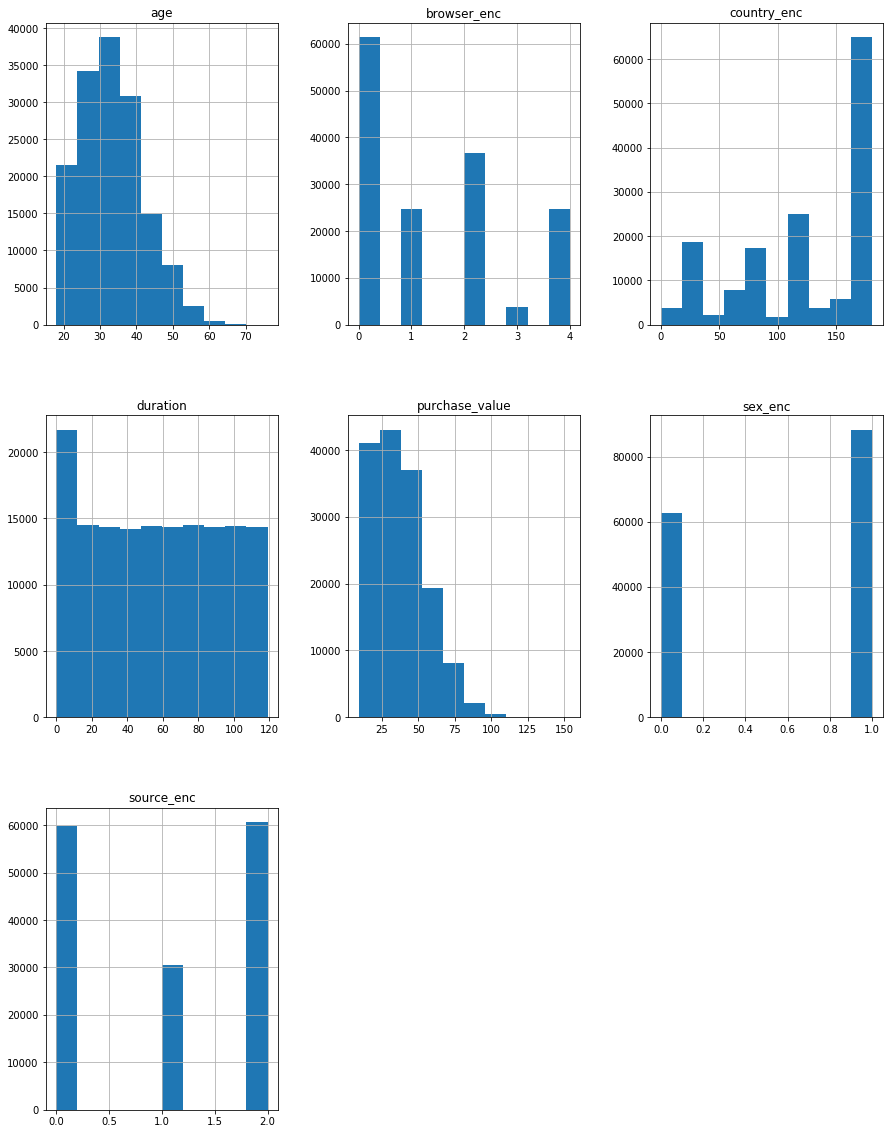

In [64]:
X.hist(figsize=(15, 20))
plt.show()

$\rightarrow$ The distribution of data for each attribute is not the Gaussian distribution.

In [65]:
from sklearn.model_selection import train_test_split
oh_X = pd.get_dummies(X)
oh_y = pd.get_dummies(y).values[:,1]
oh_std_X = StandardScaler().fit_transform(oh_X)
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = prop)
print( "\n**************************************************************" )
X_train, X_test, y_train, y_test = \
        train_test_split(oh_std_X, oh_y, test_size=.4, random_state=42)


**************************************************************


In [66]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

seed = 123

names = ['Logistic Regression',
         "Nearest Neighbors",
         'Decision Tree - Gini',
         "Decision Tree - Entropy",
         "Random Forest",
         "Neural Net",
         "AdaBoost"]

classifiers = [
    LogisticRegression(class_weight='balanced'),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=seed, min_samples_leaf=5),
    DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=seed, min_samples_leaf=5),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1, random_state=seed, oob_score=True),
    MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation='relu', solver='adam'),
    AdaBoostClassifier()]

1 Logistic Regression
1. Estimator score method

Accuracy: 64.85
Accuracy: 64.85
2. Scoring parameter

Training accuracy of 10-fold cross validation: 64.58 (+/- 0.31)
3. Metric functions

Confusion matrix:
 [[35274 19578]
 [ 1671  3922]]
Classfication report:
              precision    recall  f1-score   support

          0       0.95      0.64      0.77     54852
          1       0.17      0.70      0.27      5593

avg / total       0.88      0.65      0.72     60445

Time taken: 1.2243


----------------------------------------------------------------------------------------------------
2 Nearest Neighbors
1. Estimator score method

Accuracy: 94.23
Accuracy: 94.23
2. Scoring parameter

Training accuracy of 10-fold cross validation: 93.94 (+/- 0.27)
3. Metric functions

Confusion matrix:
 [[53951   901]
 [ 2585  3008]]
Classfication report:
              precision    recall  f1-score   support

          0       0.95      0.98      0.97     54852
          1       0.77      0.54    

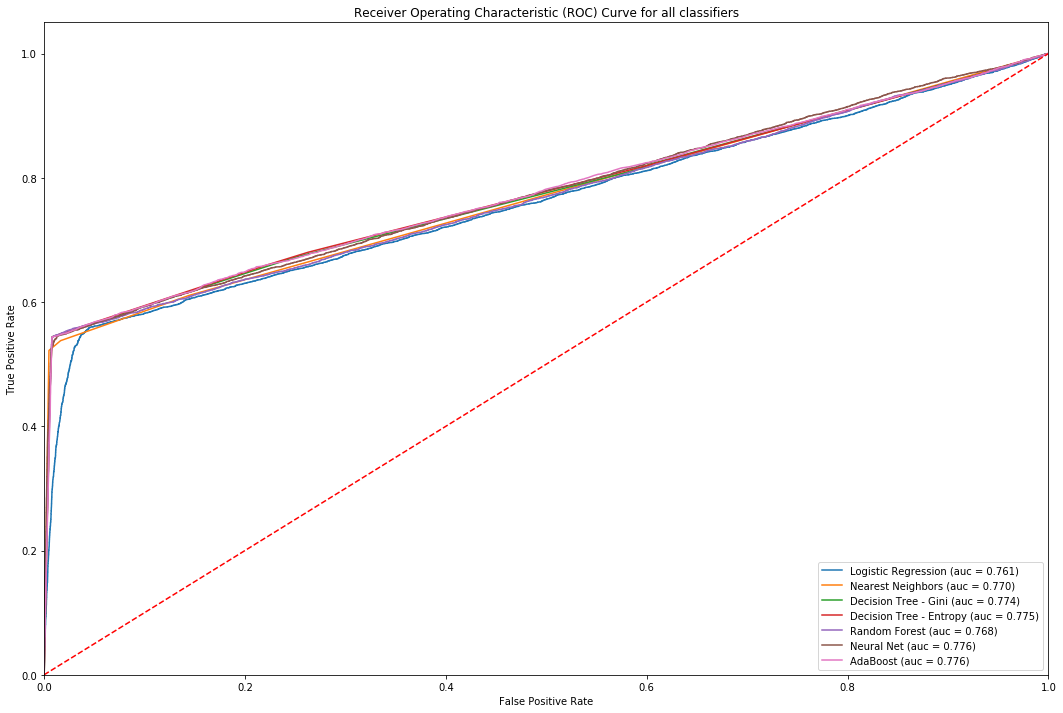

In [67]:
import time
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics

plt.figure(figsize=fig_size)
i = 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    start = time.time()
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    
    print(i, name)
    print('1. Estimator score method\n')
    print('Accuracy: {:.2f}'.format(score * 100))
    print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred) * 100))
    print('2. Scoring parameter\n')
    kfold = KFold(n_splits=10, random_state=seed)
    # fit the model with training set
    scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')
    print("Training accuracy of 10-fold cross validation: %0.2f (+/- %0.2f)" 
          % (scores.mean() * 100, scores.std() * 100))
    print('3. Metric functions\n')
#     y_pred_prob = clf.predict_proba(X_test)
#     print(set(y_test) - set(y_pred))
    print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred, labels=np.unique(y_pred)))
#     print('The probabilities of predict testing data: ', y_pred_prob)
    print('Classfication report:\n', metrics.classification_report(y_test, y_pred))
    stop = time.time()
    duration = stop - start
    print( "Time taken: %.4f" % duration)
    print('\n')
    print(100*'-')
    
    # plot ROC curve
    if hasattr(clf, 'predict_proba'):
        y_test_prob = clf.predict_proba(X_test)[:,1]
        fpr_, tpr_, _ = metrics.roc_curve(y_test, y_test_prob)
        roc_auc = metrics.auc(fpr_, tpr_)
        plt.plot(fpr_, tpr_, 
                 label='%s (auc = %0.3f)' % (name, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for all classifiers')
plt.legend(loc='lower right')
plt.show()

# Final thoughts

- Based on the model accuracy, the most accuracy model is AdaBoost (95.06%) and the lowest accuracy model is Logistic Regression (64.85%).

- Based on confusion matrix:

1. Logistic Regression: False positive = 19578, False negative = 1671

2. Nearest Neighbors: False positive = 901, False negative = 2585

3. Decision Tree - Gini: False positive = 438, False negative = 2553

4. Decision Tree - Entropy: False positive = 438, False negative = 2553

5. Random Forest: False positive = 396, False negative = 2672

6. Neural Net: False positive = 622, False negative = 2571

7. AdaBoost: False positive = 436, False negative = 2553

False positive is that when a transaction is predicted as fraud but actually, it is valid.

False negative is that when a transaction is predicted as non-fraud but actually, it is fraud.

Both False positive and False negative are expected to be low number $\rightarrow$ getting high accuracy.

In the case of Logistic Regression, the False positive is so large, which will make the belief of customers on the predict model will be decreased $\rightarrow$ Not good.

The other $6$ models, the False negative is allowed around 2500-2600 cases, which is our lost. With False positive, these models predict ~400-600 cases as fraud transaction but they are not actually. With False positive, we don't take money from customers and don't lose money to customers. Consider to the cost, the lower False negative is preferable and is also the better model. AdaBoost is the best model and Decision Tree with two criteria can also be used too.

- Based on ROC curve, the AdaBoost and Neural Net are better models, followed by Decision Tree with two criteria models.